In [1]:
import torch
import matplotlib

In [47]:
# gradient_magnitudes=torch.load('mg_gradient_resnet32.pt')
gradient_magnitudes=torch.load('mg_gradient_wrn_28_10.pt')

In [48]:
from collections import defaultdict

# Number of steps
num_steps = len(next(iter(gradient_magnitudes.values())))

# Initialize a dictionary to store the mean magnitudes for each block at each step
mean_gradients_per_block_per_step = defaultdict(lambda: [0.0] * num_steps)

# Calculate the mean gradient magnitude for each block at each step
for step in range(num_steps):
    block_sums = defaultdict(float)
    block_counts = defaultdict(int)
    
    for layer_name, grad_magnitudes in gradient_magnitudes.items():
        block_name = layer_name.split('.')[1]  # Get the block name (e.g., 'block1', 'block2')
        block_sums[block_name] += grad_magnitudes[step]
        block_counts[block_name] += 1
    
    for block_name in block_sums:
        mean_gradients_per_block_per_step[block_name][step] = block_sums[block_name] / block_counts[block_name]


In [49]:
# Calculate the average, minimum, and maximum of the mean gradient magnitudes for each block across all steps
block_stats = {}
for block_name, means in mean_gradients_per_block_per_step.items():
    avg_mean = sum(means) / len(means)
    min_mean = min(means)
    max_mean = max(means)
    block_stats[block_name] = (avg_mean, min_mean, max_mean)


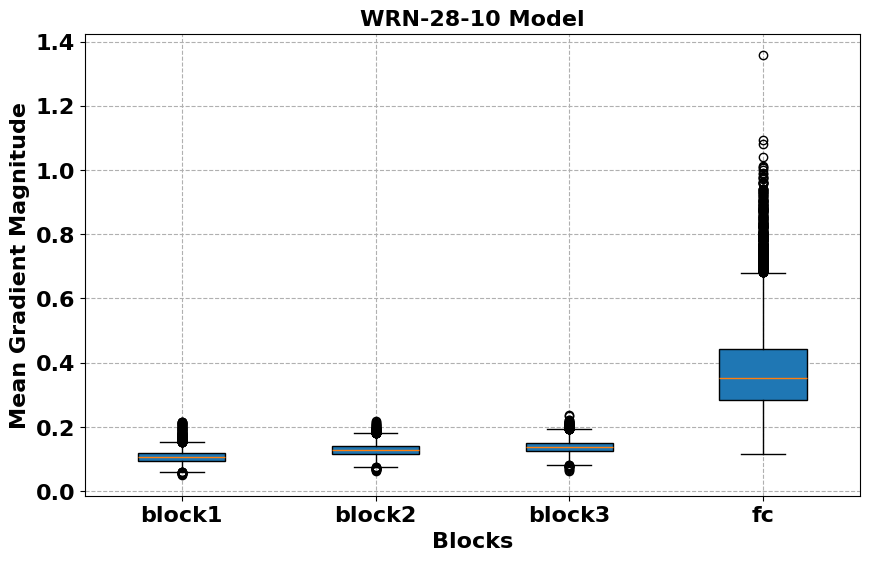

In [54]:
import matplotlib.pyplot as plt

# Assume block3 data was calculated similarly if it exists; otherwise, use available blocks
# Filtering to include only 'block1', 'block2', 'block3', and 'fc'
# If block3 doesn't exist, you can skip it or assume it's part of your data

blocks_to_plot = ['block1', 'block2', 'block3', 'fc']

# Prepare the filtered data for the box plot
box_plot_data = [mean_gradients_per_block_per_step[block] for block in blocks_to_plot if block in mean_gradients_per_block_per_step]
filtered_block_names = [block for block in blocks_to_plot if block in mean_gradients_per_block_per_step]
custom_labels = ['block1', 'block2', 'block3', 'fc']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=custom_labels, patch_artist=True)

# Set the Y-axis to a logarithmic scale
# plt.yscale('log')

# Add labels, title, and grid
plt.xlabel('Blocks',fontsize=16,fontweight='bold')
plt.ylabel('Mean Gradient Magnitude',fontsize=16,fontweight='bold')
plt.title('WRN-28-10 Model',fontsize=16,fontweight='bold')
plt.xticks(ticks=[1, 2, 3,4], labels=custom_labels, fontsize=16, fontweight='bold')

# Customize the Y-axis ticks
plt.yticks(fontsize=16, fontweight='bold')
# plt.title('Box Plot of Mean Gradient Magnitudes by Block Across 10000 Training Steps')
plt.grid(True, which='both', linestyle='--')

# Show the plot
# plt.show()
plt.savefig(f'/home/rhu/r_work/higher_semilearn/figures/magtitude_g_WRN-28-10.pdf')
